In [2]:
import os
import random
import cv2
import pickle
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
seed = 10
random.seed(seed)

In [5]:
base_dir = 'data'
train_dir = f'{base_dir}/train/'
val_dir = f'{base_dir}/val/'
test_dir = f'{base_dir}/test/'

In [6]:
def get_data(path,classes={
    'Infected': 1,
    'Not Infected': 0
}):
    data = list()
    for k,v in classes.items():
        _pth = os.path.join(path,k)
        _data = [(os.path.join(_pth,i),v) for i in os.listdir(_pth)]
        data.extend(_data)
    random.shuffle(data)
    return data


In [7]:
train_data = get_data(train_dir)
test_data = get_data(test_dir)
val_data = get_data(val_dir)

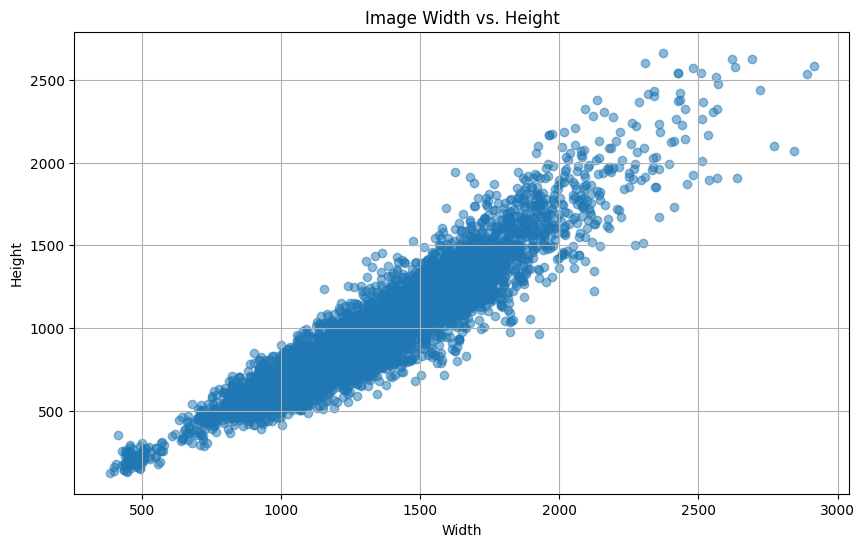

In [12]:
widths = list()
heights = list()
for image_path,_ in train_data:
    try:
        img = cv2.imread(image_path)
        height, width, _ = img.shape
        widths.append(width)
        heights.append(height)
    except:pass
plt.figure(figsize=(10, 6))
plt.scatter(widths, heights, alpha=0.5)
plt.title('Image Width vs. Height')
plt.xlabel('Width')
plt.ylabel('Height')
plt.grid(True)
plt.show()

In [13]:
img_size = 512
input_shape = (img_size, img_size, 1)

In [14]:
def process_data(data):
    processed_data = list()
    for image,label in data:
        try:
            img = cv2.imread(image,cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img,(img_size,img_size))
            img = img.reshape(*input_shape)
            img = img/255
            processed_data.append(
                (img,label)
            )
        except Exception as e: 
            print(e)
            print(image)
    return processed_data

In [15]:
train = process_data(train_data)
test = process_data(test_data)
val = process_data(val_data)

OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

data/train/Not Infected\.DS_Store
OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

data/train/Infected\.DS_Store
OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

data/val/Not Infected\.DS_Store
OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

data/val/Infected\.DS_Store


In [16]:
def save_preprocessed_data(name,data):
    with open(name,'wb') as f:
        pickle.dump(data,f)

In [17]:
save_preprocessed_data('processed_data/train.pickle',train)
save_preprocessed_data('processed_data/test.pickle',test)
save_preprocessed_data('processed_data/val.pickle',val)
save_preprocessed_data('processed_data/input_shape.pickle',input_shape)